In [23]:
!git clone https://github.com/Yaswanth-B/AccessibleLLM.git

fatal: destination path 'AccessibleLLM' already exists and is not an empty directory.


In [24]:
!pip install huggingface_hub
!pip install transformers
!pip install bert-score torch transformers

In [25]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = '/content/AccessibleLLM/object detection/pictureDS.zip'

# Directory to extract to
extract_path = '/content/AccessibleLLM/object detection/picturedataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)

['pictureDS']

In [26]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [27]:
import requests #Allows you to send HTTP requests easily in Python.
import numpy as np
import PIL # PIL (or its fork Pillow) is used for opening, manipulating, and saving many different image file formats in Python.
import io
import html
import time
from base64 import b64decode, b64encode
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import cv2
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import bert_score

Enter the image number (1-50): 3


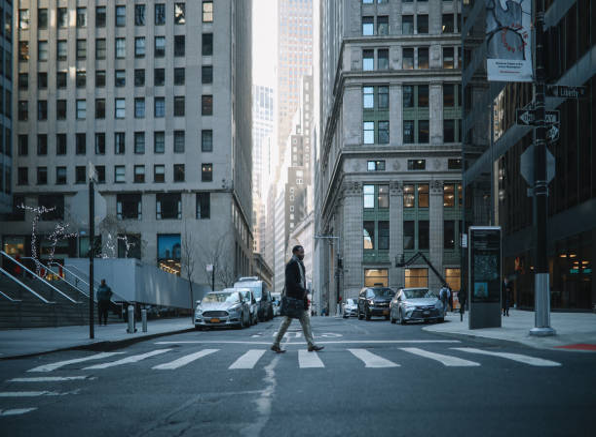

In [42]:
import os
from PIL import Image

image_number = int(input("Enter the image number (1-50): "))

if 1 <= image_number <= 50:

    image_path = f"/content/AccessibleLLM/object detection/picturedataset/pictureDS/{image_number}.jpg"

    if os.path.exists(image_path):

        image = Image.open(image_path).convert('RGB')

        image = image.resize((596, 437))

        display(image)
    else:
        print("Image file not found.")
else:
    print("Invalid image number. Please enter a number between 1 and 50.")


In [29]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [43]:
max_new_tokens = 40
min_length = 20
num_beams = 4
gen_kwargs = {"max_new_tokens":max_new_tokens, "min_length": min_length, "num_beams":num_beams}

pixel_values = feature_extractor(images=image, return_tensors="pt").pixel_values
pixel_values = pixel_values.to(device)

output_ids = model.generate(pixel_values, **gen_kwargs)

preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
preds = [pred.strip() for pred in preds]
print(preds)

['a person crossing a street at night with a car on the road behind them and a building behind them']


In [44]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import bert_score

# Sample captions generated by BLIP-2 Model
captions_Blip = preds[0].strip().split('\n')
captions_Blip = []
for pred in preds:
    captions_Blip.append(pred.strip())
print(captions_Blip)


# Ask the user for the line number
line_number = int(input("which picture did you select? (starting from 1): "))

# Read text from the file
with open("/content/AccessibleLLM/object detection/truetext.txt", "r") as file:
    lines = file.readlines()

# Check if the line number provided by the user is within the range of lines in the file
if 1 <= line_number <= len(lines):
    # Select the line based on the line number provided by the user
    selected_line = lines[line_number - 1].strip()
    references = [selected_line]  # Store the selected line in the references list
    print(references)


# Compute BERT Score for BLIP-2
P_A, R_A, F1_A = bert_score.score(
    captions_Blip,
    references,
    lang='en',
    model_type='bert-base-uncased',  # BERT model type
    # verbose=True  # Print progress
)


# Print results for BLIP-2 model
print("BERTScore for BLIP-2 Model:")
print(f"Precision: {P_A.mean():.4f}")
print(f"Recall: {R_A.mean():.4f}")
print(f"F1-score: {F1_A.mean():.4f}")



['a person crossing a street at night with a car on the road behind them and a building behind them']
which picture did you select? (starting from 1): 3
['a man crossing the street with cars and buildings in the background']
BERTScore for BLIP-2 Model:
Precision: 0.6362
Recall: 0.7211
F1-score: 0.6760
